In [25]:
import json
import gensim
from gensim.test.utils import datapath
from gensim import models
from gensim import corpora
import numpy as np
import pandas as pd
import re
from pymystem3 import Mystem
mystem = Mystem()

from stop_words import get_stop_words

import string

import nltk
import pyLDAvis.gensim
import time
import matplotlib.pyplot as plt
from collections import Counter

from wordcloud import WordCloud

In [2]:
def get_texts(data, ngr:int = None):
    texts = []
    for sen in data:
        text = []
        bi_text = []
        for tok in mystem.lemmatize(sen):
            if tok not in stop_words and len(tok) > 3:
                text.append(tok.lower())
        if ngr is not None:
            for ins in nltk.ngrams(text, ngr):
                bi_text.append(' '.join(ins))
                
        if  text:
            texts.append(text+bi_text)

    return(texts)

In [142]:
file = open('/Users/aleksejfilippov/Desktop/Python_projects/topic_model/data_for_topic model/a_lot_of_rus_mes.txt', 'r')
data_rus = []
for line in file.readlines():
    if len(line)>10 and len(line) < 100:
        data_rus.append(line)
file.close()

file = open('/Users/aleksejfilippov/Desktop/Python_projects/topic_model/data_for_topic model/stop_words.txt', 'r')
stop_words = [x[:-1] for x in file.readlines()]
file.close()
stop_words = stop_words + ['?. ','\n', '"\n',': ', '\': "\'',') ','! ',')\n', '\://', 'vk','',
                           '\')))\n\'','https', 'llhhll', 'https llhhll', 'ребята', 'знать', 'давать', 'делать', 'говорить',
                           'написать', 'идти', 'неделя', 'взять', 'кто-нибудь', 'кто-то', 'никто', 'свой', 'ничто', 'дело', 'саша', 'иван',
                           'что-то','сразу','пойти','сюда','оставаться','денис','любой','минута','видеть','пойти','саня','никита','интересно',
                           'поздно','начало','готовый','слово','ваня','короче','сходить','страница','откуда','пить','стол','евсеев','слышать',
                           'лежать','какой-то','нужный','','','','','','','','','','','','','','','','','','','','','','','',''
                          ] + [str(i) for i in range(100)]

<>:11: DeprecationWarning: invalid escape sequence \:
<>:11: DeprecationWarning: invalid escape sequence \:
<>:11: DeprecationWarning: invalid escape sequence \:
<ipython-input-142-3b3fde57886f>:11: DeprecationWarning: invalid escape sequence \:
  stop_words = stop_words + ['?. ','\n', '"\n',': ', '\': "\'',') ','! ',')\n', '\://', 'vk','',


In [65]:
count1 = Counter(" ".join(data_rus).split()).most_common(150)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words", 1 : "count"})
stop_words = stop_words + df1.words[:100].tolist()
# df1[:50]

In [66]:
texts = get_texts(data_rus)
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [67]:
data_txt = [' '.join(t) for t in texts]

In [ ]:
count1 = Counter(" ".join(data_txt).split()).most_common(150)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words", 1 : "count"})
# df1[:50]

In [69]:
%time model = models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=10, passes=20)

CPU times: user 1min 24s, sys: 324 ms, total: 1min 24s
Wall time: 1min 25s


In [121]:
model.save('/Users/aleksejfilippov/Desktop/Python_projects/topic_model/trained_models/model1/model1')
dictionary.save('/Users/aleksejfilippov/Desktop/Python_projects/topic_model/trained_models/model1/dict1')

In [70]:
perplexity = model.log_perplexity(list(corpus))
2**(-perplexity)

1535.981238924964

In [73]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(model, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.326493 -0.025396       1        1  10.820519
6     -0.101712 -0.311387       2        1  10.404324
5     -0.184145  0.153624       3        1  10.225724
9      0.042408  0.157177       4        1  10.087274
7     -0.014728 -0.013067       5        1  10.059299
1     -0.016800 -0.017303       6        1   9.830543
4     -0.016489 -0.014401       7        1   9.817594
0     -0.008826 -0.005818       8        1   9.638880
8      0.003491 -0.007685       9        1   9.585141
2     -0.029692  0.084256      10        1   9.530705, topic_info=      Category        Freq        Term       Total  loglift  logprob
term                                                                
2251   Default  532.000000       билет  532.000000  30.0000  30.0000
1352   Default  342.000000      задача  342.000000  29.0000  29.0000
304    Default  300.000000  спрашивать  300.000000  28.0000  28.0000
288    Default  304.000000       матан  304.000000  27.0000  27.0000
811    Default  295.000000    петрович  295.000000  26.0000  26.0000
247    Default  289.000000    находить  289.000000  25.0000  25.0000
9      Default  283.000000      писать  283.000000  24.0000  24.0000
488    Default  285.000000      нужный  285.000000  23.0000  23.0000
348    Default  274.000000     сдавать  274.000000  22.0000  22.0000
6      Default  269.000000      вопрос  269.000000  21.0000  21.0000
373    Default  238.000000      группа  238.000000  20.0000  20.0000
776    Default  228.000000      решать  228.000000  19.0000  19.0000
46     Default  231.000000   приходить  231.000000  18.0000  18.0000
332    Default  222.000000   скидывать  222.000000  17.0000  17.0000
649    Default  221.000000    понимать  221.000000  16.0000  16.0000
660    Default  217.000000      лекция  217.000000  15.0000  15.0000
221    Default  208.000000      общага  208.000000  14.0000  14.0000
353    Default  208.000000     сделать  208.000000  13.0000  13.0000
6814   Default  205.000000     теормех  205.000000  12.0000  12.0000
355    Default  178.000000    работать  178.000000  11.0000  11.0000
76     Default  174.000000       норма  174.000000  10.0000  10.0000
2763   Default  163.000000     экзамен  163.000000   9.0000   9.0000
889    Default  164.000000      кинуть  164.000000   8.0000   8.0000
496    Default  164.000000      ходить  164.000000   7.0000   7.0000
377    Default  162.000000      думать  162.000000   6.0000   6.0000
201    Default  160.000000    помогать  160.000000   5.0000   5.0000
702    Default  157.000000      ботать  157.000000   4.0000   4.0000
194    Default  151.000000     комната  151.000000   3.0000   3.0000
240    Default  152.000000        пара  152.000000   2.0000   2.0000
41     Default  150.000000        курс  150.000000   1.0000   1.0000
...        ...         ...         ...         ...      ...      ...
332    Topic10  221.183670   скидывать  222.056763   2.3467  -3.3595
194    Topic10  151.106232     комната  151.979340   2.3449  -3.7405
2371   Topic10  117.329529     вариант  118.202606   2.3432  -3.9935
503    Topic10  107.203316   закрывать  108.076408   2.3425  -4.0838
424    Topic10   98.843544      физтех   99.716637   2.3419  -4.1649
996    Topic10   76.902237       семер   77.775314   2.3394  -4.4159
82     Topic10   75.353134        жить   76.226212   2.3391  -4.4363
1450   Topic10   72.833000     прошлый   73.706108   2.3387  -4.4703
36     Topic10   68.538933       общий   69.412033   2.3380  -4.5311
1087   Topic10   66.264244   программа   67.137344   2.3376  -4.5648
359    Topic10   63.391056      оценка   64.264183   2.3370  -4.6092
1307   Topic10   61.312561    задачник   62.185688   2.3365  -4.6425
65     Topic10   56.652912      прийти   57.526001   2.3354  -4.7215
2221   Topic10   56.110367        вода   56.983463   2.3352  -4.7312
1496   Topic10   53.645618       пацан   54.518703   2.3345  -4.77

In [75]:
def get_list_from_string(s:str)->list:
    b = []
    tmp = s.split('\"')
    for i in range(len(tmp)):
        if i%2 != 0: b.append(tmp[i])
    return b
            

In [122]:
def get_picture(message:str = None):
    if message == None:
        file = open('/Users/aleksejfilippov/Desktop/Python_projects/data_for_topic model/incoming_data.txt', 'r')
        incom_data = [x[:-1] for x in file.readlines()]
        file.close()
    else:
        incom_data = [message]

    incom_texts = get_texts(incom_data)

    incom_corpus = [dictionary.doc2bow(text) for text in incom_texts]

    model.update(incom_corpus, passes=10)
    
    l = model.get_document_topics(incom_corpus[0])
    ll = [x[1] for x in l]
    topic_index = l[ll.index(np.max(ll))][0]
    
    topic_words = model.show_topics()[topic_index][1]
    
    wordcloud = WordCloud(width=400, height=200).generate(' '.join(get_list_from_string(topic_words)))
    plt.imshow(wordcloud)
    print(incom_data)
    return(wordcloud)

['Понятно что только PDF файл лекции понять до конца нельзя потому что практические ошибки различных схем были показаны о обсуждены живьём на лекции, но в PDF файле нашли только ограниченное отражение.']
CPU times: user 430 ms, sys: 20 ms, total: 450 ms
Wall time: 454 ms


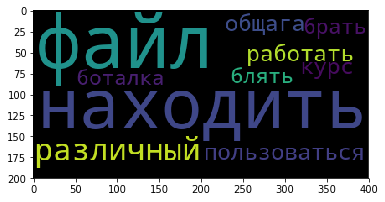

In [141]:
%time res = get_picture()

In [138]:
res.to_image().save('/Users/aleksejfilippov/Desktop/Python_projects/img.jpg')

In [127]:
type(res.to_image())

PIL.Image.Image